In [2]:
import numpy as np
import torch
import torch.optim as optim

### Part 4.a

In [19]:
x = torch.ones(10000)
x = x.uniform_(0.0, 1.0)
print(x.size(), x[:2])

torch.Size([10000]) tensor([0.8962, 0.1216])


In [20]:
y = torch.sin(10*torch.pi*torch.pow(x, 4))
y.size(), y[:2]

(torch.Size([10000]), tensor([0.9878, 0.0069]))

In [10]:
y.min(), y.max()

(tensor(-1.), tensor(1.0000))

In [7]:
# x = x.reshape((64,128))
# y = y.reshape((64,128))

### Part 4.b

In [3]:
from torch import nn

In [4]:
device='cpu'
print("Using {} device".format(device))

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        # self.flatten = nn.Flatten()
        self.first_layer = nn.Linear(1,128)
        self.relu_layer = nn.ReLU()
        self.second_layer = nn.Linear(128,256)
        self.fc_layer = nn.Linear(256,256)
        self.third_layer = nn.Linear(256, 128)
        self.output_layer = nn.Linear(128,1)
        self.bn_layer1 = nn.BatchNorm1d(128)
        self.bn_layer2 = nn.BatchNorm1d(256)
        self.tanh_layer = nn.Tanh()

    # def forward(self, x):
    #     x = self.first_layer(x)
    #     x = self.relu_layer(x)
    #     x = self.bn_layer(x)
    #     x = self.second_layer(x)
    #     x = self.relu_layer(x)
    #     x = self.bn_layer(x)
    #     output = self.output_layer(x)

    #     return output

    def forward(self, x):
        x = self.first_layer(x)
        x = self.relu_layer(x)
        x = self.bn_layer1(x)
        x = self.second_layer(x)
        x = self.relu_layer(x)
        x = self.bn_layer2(x)
        # x = self.fc_layer(x)
        # x = self.relu_layer(x)
        # x = self.bn_layer2(x)
        x = self.third_layer(x)
        x = self.relu_layer(x)
        x = self.bn_layer1(x)
        output = self.output_layer(x)
        return output

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (first_layer): Linear(in_features=1, out_features=128, bias=True)
  (relu_layer): ReLU()
  (second_layer): Linear(in_features=128, out_features=256, bias=True)
  (fc_layer): Linear(in_features=256, out_features=256, bias=True)
  (third_layer): Linear(in_features=256, out_features=128, bias=True)
  (output_layer): Linear(in_features=128, out_features=1, bias=True)
  (bn_layer1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_layer2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tanh_layer): Tanh()
)


In [26]:
batch_size = 64
n_batches = 128
n_batches

128

In [137]:
64*128

8192

In [135]:
np.random.choice(np.arange(0,10000),batch_size)

array([1970, 4028, 1516, 8561,  762, 4105, 8871, 8605, 3905, 3016, 7172,
       8073, 8251,  853, 5700, 3923, 8752, 5478, 3243, 1284, 2981, 3328,
       9068, 8066, 1935, 8862, 2958, 2592, 1305, 2847, 7339, 9572])

In [96]:
def train(net, optimizer, criterion, batch_size, n_batches, x, y, epochs, model_name, plot):
    model = net.to(device)
    total_step = n_batches
    train_loss_values = []
    schedule_lr = 1e-2
    for epoch in range(epochs):
        correct = 0
        total = 0
        running_loss = 0.0
        # print(schedule_lr)
        # if epoch % 20==0 and epoch>0 and epoch <61:
        #     schedule_lr = schedule_lr * 0.1
        #     for op_params in optimizer.param_groups:
        #         op_params['lr'] = schedule_lr
        # if epoch % 5==0 and epoch>60 and epoch <120:
        #     schedule_lr = schedule_lr * 0.1
        #     for op_params in optimizer.param_groups:
        #         op_params['lr'] = schedule_lr
        for i in range(n_batches):
            idx = np.random.choice(np.arange(0,10000),batch_size)
            input = x[idx].reshape((-1,1)).to(device)
            # print(input.shape)
            labels = y[idx].reshape((-1,1)).to(device)
            # Move tensors to configured device
            # input = x[:,i].reshape((-1,1)).to(device)
            # labels = y[:,i].reshape((-1,1)).to(device)
            #Forward Pass
            outputs = model(input)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            running_loss += loss.item()*batch_size
            total += batch_size
            optimizer.step()
        # if epoch % 50 == 0: 
        print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, i+1, total_step, running_loss/total))
        train_loss_values.append(running_loss/total)

    return train_loss_values

In [97]:
batch_size = 512
n_batches = 10000//batch_size

In [98]:
n_batches

19

In [138]:
model = NeuralNetwork().to(device) ## scheduler 500
epochs = 100
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.0, weight_decay=0.002, nesterov=False)
train_loss_values= train(model, optimizer, criterion, batch_size, n_batches, x, y, epochs, 'nn_curve', True)

Epoch [1/100], Step [19/19], Loss: 0.2243
Epoch [2/100], Step [19/19], Loss: 0.1514
Epoch [3/100], Step [19/19], Loss: 0.1214
Epoch [4/100], Step [19/19], Loss: 0.1001
Epoch [5/100], Step [19/19], Loss: 0.1019
Epoch [6/100], Step [19/19], Loss: 0.0888
Epoch [7/100], Step [19/19], Loss: 0.0787
Epoch [8/100], Step [19/19], Loss: 0.0712
Epoch [9/100], Step [19/19], Loss: 0.0575
Epoch [10/100], Step [19/19], Loss: 0.0645
Epoch [11/100], Step [19/19], Loss: 0.0478
Epoch [12/100], Step [19/19], Loss: 0.0598
Epoch [13/100], Step [19/19], Loss: 0.0385
Epoch [14/100], Step [19/19], Loss: 0.0463
Epoch [15/100], Step [19/19], Loss: 0.0396
Epoch [16/100], Step [19/19], Loss: 0.0396
Epoch [17/100], Step [19/19], Loss: 0.0403
Epoch [18/100], Step [19/19], Loss: 0.0391
Epoch [19/100], Step [19/19], Loss: 0.0339
Epoch [20/100], Step [19/19], Loss: 0.0282
Epoch [21/100], Step [19/19], Loss: 0.0279
Epoch [22/100], Step [19/19], Loss: 0.0340
Epoch [23/100], Step [19/19], Loss: 0.0276
Epoch [24/100], Step

In [174]:
model = NeuralNetwork().to(device)
epochs = 100
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3,weight_decay=1e-3) #, weight_decay=0.0001
train_loss_values= train(model, optimizer, criterion, batch_size, n_batches, x, y, epochs, 'nn_curve', True)

Epoch [1/100], Step [19/19], Loss: 0.2640
Epoch [2/100], Step [19/19], Loss: 0.1127
Epoch [3/100], Step [19/19], Loss: 0.0712
Epoch [4/100], Step [19/19], Loss: 0.0348
Epoch [5/100], Step [19/19], Loss: 0.0423
Epoch [6/100], Step [19/19], Loss: 0.0299
Epoch [7/100], Step [19/19], Loss: 0.0223
Epoch [8/100], Step [19/19], Loss: 0.0210
Epoch [9/100], Step [19/19], Loss: 0.0239
Epoch [10/100], Step [19/19], Loss: 0.0235
Epoch [11/100], Step [19/19], Loss: 0.0208
Epoch [12/100], Step [19/19], Loss: 0.0176
Epoch [13/100], Step [19/19], Loss: 0.0183
Epoch [14/100], Step [19/19], Loss: 0.0190
Epoch [15/100], Step [19/19], Loss: 0.0241
Epoch [16/100], Step [19/19], Loss: 0.0196
Epoch [17/100], Step [19/19], Loss: 0.0152
Epoch [18/100], Step [19/19], Loss: 0.0154
Epoch [19/100], Step [19/19], Loss: 0.0186
Epoch [20/100], Step [19/19], Loss: 0.0136
Epoch [21/100], Step [19/19], Loss: 0.0123
Epoch [22/100], Step [19/19], Loss: 0.0131
Epoch [23/100], Step [19/19], Loss: 0.0118
Epoch [24/100], Step

In [145]:
model = NeuralNetwork().to(device)
epochs = 100
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3,weight_decay=1e-3) #, weight_decay=0.0001
train_loss_values= train(model, optimizer, criterion, batch_size, n_batches, x, y, epochs, 'nn_curve', True)

Epoch [1/100], Step [128/128], Loss: 0.1799
Epoch [2/100], Step [128/128], Loss: 0.1184
Epoch [3/100], Step [128/128], Loss: 0.1057
Epoch [4/100], Step [128/128], Loss: 0.0779
Epoch [5/100], Step [128/128], Loss: 0.0938
Epoch [6/100], Step [128/128], Loss: 0.0738
Epoch [7/100], Step [128/128], Loss: 0.0653
Epoch [8/100], Step [128/128], Loss: 0.0672
Epoch [9/100], Step [128/128], Loss: 0.0628
Epoch [10/100], Step [128/128], Loss: 0.0658
Epoch [11/100], Step [128/128], Loss: 0.0599
Epoch [12/100], Step [128/128], Loss: 0.0624
Epoch [13/100], Step [128/128], Loss: 0.0620
Epoch [14/100], Step [128/128], Loss: 0.0734
Epoch [15/100], Step [128/128], Loss: 0.0498
Epoch [16/100], Step [128/128], Loss: 0.0586
Epoch [17/100], Step [128/128], Loss: 0.0601
Epoch [18/100], Step [128/128], Loss: 0.0509
Epoch [19/100], Step [128/128], Loss: 0.0389
Epoch [20/100], Step [128/128], Loss: 0.0398
Epoch [21/100], Step [128/128], Loss: 0.0234
Epoch [22/100], Step [128/128], Loss: 0.0249
Epoch [23/100], Ste

In [180]:
torch.save(model, 'model1_100epoch_hw4_p4.pt')
np.save('train_loss_values_hw4_p4_pb.npy', np.array(train_loss_values))

In [67]:
model = torch.load('model1_100epoch_hw4_p4.pt')
train_loss_values = np.load('train_loss_values_hw4_p4_pb.npy')

In [181]:
np.array(train_loss_values).min(), np.array(train_loss_values).max()

(0.0060130440335916845, 0.2640358366464314)

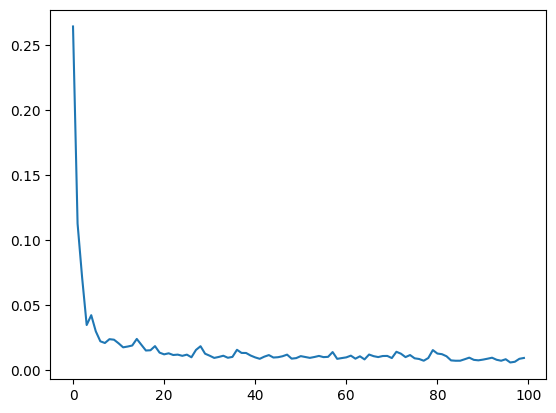

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.array(train_loss_values))

In [175]:
x_in = torch.ones(1000)
x_in = x_in.uniform_(0.0, 1.0)
print(x_in.size(), x_in[:2])
y_in = torch.sin(10*torch.pi*torch.pow(x_in, 4))
y_in.size(), y_in[:2], y_in.min(), y_in.max()

torch.Size([1000]) tensor([0.6471, 0.4676])


(torch.Size([1000]), tensor([-0.7006,  0.9976]), tensor(-1.0000), tensor(1.))

In [182]:
x_out = torch.ones(1000)
x_out = x_out.uniform_(0.0, 1.5)
print(x_out.size(), x_out[:2])
y_out = torch.sin(10*torch.pi*torch.pow(x_out, 4))
y_out.size(), y_out[:2], y_out.min(), y_out.max()

torch.Size([1000]) tensor([2.0440, 2.2353])


(torch.Size([1000]),
 tensor([ 0.9788, -0.8952]),
 tensor(-1.0000),
 tensor(0.9999))

In [177]:
model.eval()

NeuralNetwork(
  (first_layer): Linear(in_features=1, out_features=128, bias=True)
  (relu_layer): ReLU()
  (second_layer): Linear(in_features=128, out_features=256, bias=True)
  (fc_layer): Linear(in_features=256, out_features=256, bias=True)
  (third_layer): Linear(in_features=256, out_features=128, bias=True)
  (output_layer): Linear(in_features=128, out_features=1, bias=True)
  (bn_layer1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn_layer2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (tanh_layer): Tanh()
)

In [183]:
pred_y_in = torch.squeeze(model(x_in.reshape((-1,1))).detach())
pred_y_out = torch.squeeze(model(x_out.reshape((-1,1))).detach())
pred_y_in.shape, pred_y_out.shape

(torch.Size([1000]), torch.Size([1000]))

In [184]:
print('Largest discrepancy within the support is:', torch.abs(pred_y_in - y_in).numpy().max())
print('Largest discrepancy outside the support is:', torch.abs(pred_y_out - y_out).numpy().max())

Largest discrepancy within the support is: 4.299516
Largest discrepancy outside the support is: 22.104202


### Part 4.c

In [6]:
model = NeuralNetwork().to(device)
epochs = 100
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3,weight_decay=1e-3) #, weight_decay=0.0001

In [8]:
ns = np.logspace(1,3,20).astype(int)
ns

array([  10,   12,   16,   20,   26,   33,   42,   54,   69,   88,  112,
        143,  183,  233,  297,  379,  483,  615,  784, 1000])

In [7]:
epochs

100

In [11]:
def train(net, optimizer, criterion, batch_size, n_batches, x, y, epochs, model_name, plot, n):
    model = net.to(device)
    total_step = n_batches
    train_loss_values = []
    schedule_lr = 1e-3
    for epoch in range(epochs):
        correct = 0
        total = 0
        running_loss = 0.0
        # print(schedule_lr)
        if epoch % 20==0 and epoch>0 and epoch <61:
            schedule_lr = schedule_lr * 0.1
            for op_params in optimizer.param_groups:
                op_params['lr'] = schedule_lr
        if epoch % 5==0 and epoch>60 and epoch <120:
            schedule_lr = schedule_lr * 0.1
            for op_params in optimizer.param_groups:
                op_params['lr'] = schedule_lr
        for i in range(n_batches):
            idx = np.random.choice(np.arange(0,n),batch_size)
            input = x[idx].reshape((-1,1)).to(device)
            # print(input.shape)
            labels = y[idx].reshape((-1,1)).to(device)
            # Move tensors to configured device
            # input = x[:,i].reshape((-1,1)).to(device)
            # labels = y[:,i].reshape((-1,1)).to(device)
            #Forward Pass
            outputs = model(input)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            running_loss += loss.item()*batch_size
            total += batch_size
            optimizer.step()
        # if epoch % 50 == 0: 
        #     print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, epochs, i+1, total_step, running_loss/total))
        train_loss_values.append(running_loss/total)

    return train_loss_values

In [15]:
%%time
mean_dis_in_list = []
std_dis_in_list = []
mean_dis_out_list = []
std_dis_out_list = []
for n in ns:
    i = ((np.log2(n)-1)/2).astype(int)
    batch_size = 2**i
    n_batches = 2**(i+1)
    print(batch_size, n_batches, batch_size*n_batches)
    dis_in_list = []
    dis_out_list = []
    for rerun_i in range(5):
        ## train dataset
        x_train = torch.ones(n)
        x_train = x_train.uniform_(0.0, 1.0)
        y_train = torch.sin(10*torch.pi*torch.pow(x_train, 4))
        ## model training
        model = NeuralNetwork().to(device)
        # epochs = 100
        # criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=1e-3,weight_decay=1e-3) #, weight_decay=0.0001
        train_loss_values= train(model, optimizer, criterion, batch_size, n_batches, x_train, y_train, epochs, 'nn_curve', True, n)
        ## discrepancy data
        x_in = torch.ones(1000)
        x_in = x_in.uniform_(0.0, 1.0)
        y_in = torch.sin(10*torch.pi*torch.pow(x_in, 4))
        x_out = torch.ones(1000)
        x_out = x_out.uniform_(0.0, 1.5)
        y_out = torch.sin(10*torch.pi*torch.pow(x_out, 4))

        pred_y_in = torch.squeeze(model(x_in.reshape((-1,1))).detach())
        pred_y_out = torch.squeeze(model(x_out.reshape((-1,1))).detach())

        dis_in_list.append(torch.abs(pred_y_in - y_in).detach().numpy().max())
        dis_out_list.append(torch.abs(pred_y_out - y_out).detach().numpy().max())

        # print('Largest discrepancy within the support is:', torch.abs(pred_y_in - y_in).detach().numpy().max())
        # print('Largest discrepancy outside the support is:', torch.abs(pred_y_out - y_out).detach().numpy().max())  

    mean_dis_in_list.append(np.array(dis_in_list).mean())
    std_dis_in_list.append(np.array(dis_in_list).std())
    mean_dis_out_list.append(np.array(dis_out_list).mean())
    std_dis_out_list.append(np.array(dis_out_list).std())

2 4 8
2 4 8
2 4 8
2 4 8
2 4 8
4 8 32
4 8 32
4 8 32
4 8 32
4 8 32
4 8 32
8 16 128
8 16 128
8 16 128
8 16 128
8 16 128
8 16 128
16 32 512
16 32 512
16 32 512
CPU times: total: 1min 10s
Wall time: 10min 41s


In [13]:
np.save('mean_dis_in_list_hw4_p4_pb.npy', np.array(mean_dis_in_list))
np.save('std_dis_in_list_hw4_p4_pb.npy', np.array(std_dis_in_list))
np.save('mean_dis_out_list_hw4_p4_pb.npy', np.array(mean_dis_out_list))
np.save('std_dis_out_list_hw4_p4_pb.npy', np.array(std_dis_out_list))

In [146]:
np.save('ns_hw4_p4_pc.npy', ns)

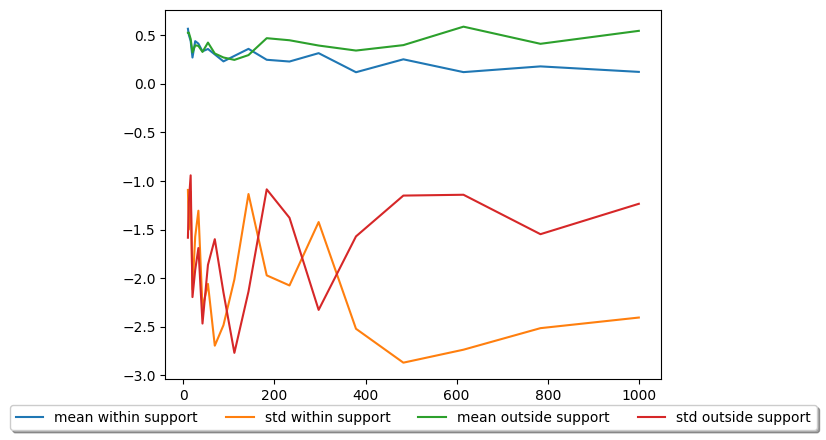

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ns,np.log(np.array(mean_dis_in_list)), label = 'mean within support')
plt.plot(ns,np.log(np.array(std_dis_in_list)), label = 'std within support')
plt.plot(ns,np.log(np.array(mean_dis_out_list)), label = 'mean outside support')
plt.plot(ns,np.log(np.array(std_dis_out_list)), label = 'std outside support')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
plt.show()